In [31]:
import math
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Stock Price Prediction

In [21]:
df = pd.read_excel('TOYOTA_monthly.xlsx')
df = df[['date','AvgRate','AvgCompound','sales','PercPos','Close','Mkt-RF','SMB','HML']]
df = df.dropna(how='any')
df = df.set_index('date')

#Normilize 
scaler = MinMaxScaler(feature_range=(0,1))
df[['AvgRate','Close','sales']] = scaler.fit_transform(df[['AvgRate','Close','sales']])

#Shift Data Frame
projection = 4
df['prediction'] = df[['Close']].shift(-projection)
df_1 = df[:-4]
X = df_1.drop(columns=['prediction',],axis=1)
y = df_1['prediction']

#Train Test Split 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.15)

x_test2 = df.drop(columns=['prediction'])
y_test2 = df['prediction']

In [4]:
#Neural Networks Regression Stock Price

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()
model.add(Dense(1000, input_dim=8,activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(125,activation='relu'))
model.add(Dense(50,activation='relu'))

model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

history = model.fit(x_train, y_train, validation_split=0.2, epochs= 500)

Epoch 1/500
5/5 [==============================] - 1s 54ms/step - loss: 0.0853 - mae: 0.2293 - val_loss: 0.0345 - val_mae: 0.1478
Epoch 2/500
5/5 [==============================] - 0s 12ms/step - loss: 0.0279 - mae: 0.1320 - val_loss: 0.0278 - val_mae: 0.1380
Epoch 3/500
5/5 [==============================] - 0s 11ms/step - loss: 0.0199 - mae: 0.1175 - val_loss: 0.0141 - val_mae: 0.0940
Epoch 4/500
5/5 [==============================] - 0s 11ms/step - loss: 0.0158 - mae: 0.1006 - val_loss: 0.0212 - val_mae: 0.1166
Epoch 5/500
5/5 [==============================] - 0s 12ms/step - loss: 0.0150 - mae: 0.0978 - val_loss: 0.0133 - val_mae: 0.0926
Epoch 6/500
5/5 [==============================] - 0s 12ms/step - loss: 0.0110 - mae: 0.0807 - val_loss: 0.0144 - val_mae: 0.0962
Epoch 7/500
5/5 [==============================] - 0s 11ms/step - loss: 0.0100 - mae: 0.0804 - val_loss: 0.0125 - val_mae: 0.0904
Epoch 8/500
5/5 [==============================] - 0s 13ms/step - loss: 0.0094 - mae: 0.07

1/1 [==============================] - 0s 22ms/step - loss: 0.0099 - mae: 0.0786
Mean squared error : 0.009910967200994492
Mean absolute error: 0.07861047238111496


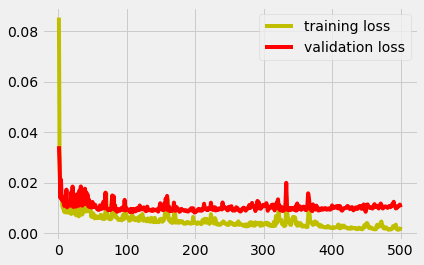

In [5]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'y',label='training loss')
plt.plot(epochs, val_loss,'r',label='validation loss')
plt.legend()

mse_neural, mae_neural = model.evaluate(x_test,y_test)

print('Mean squared error :',mse_neural)
print('Mean absolute error:',mae_neural)

y_pred_neu = model.predict(x_test)
r2_neu = r2_score(y_test,y_pred_neu)

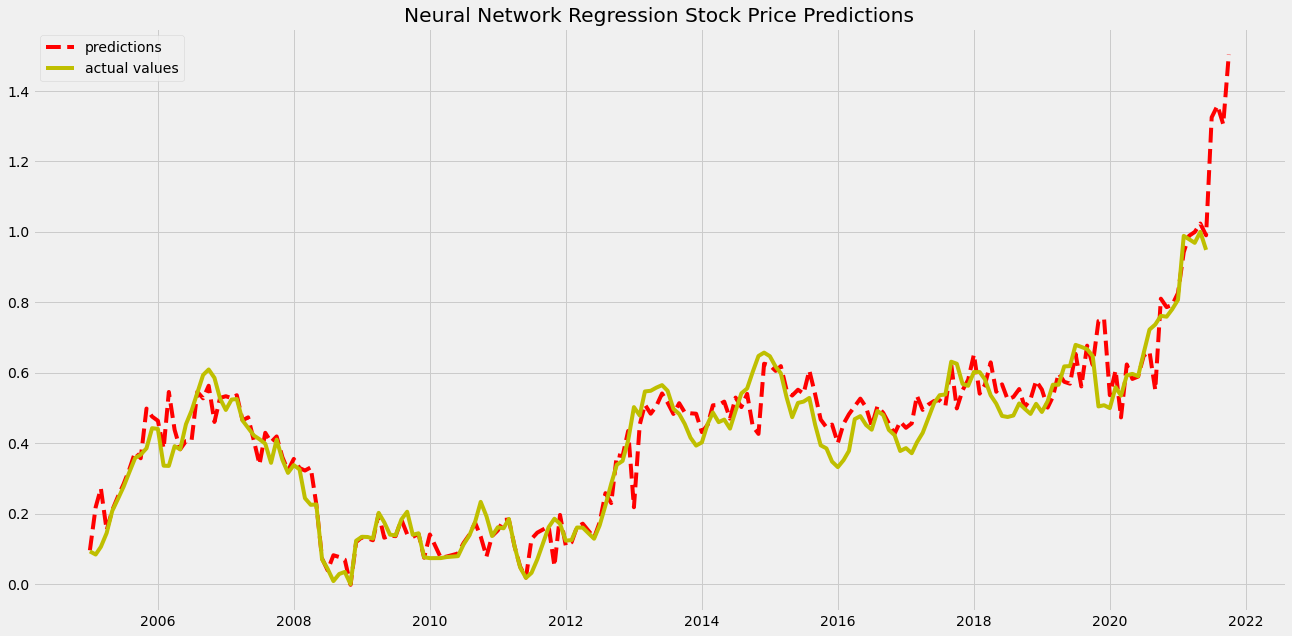

In [6]:
#Neural networks stock price predicitons
y_pred_neu2 = model.predict(x_test2)
neu_pred_data = pd.DataFrame(y_pred_neu2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Neural Network Regression Stock Price Predictions')
plt.plot(neu_pred_data[0],'r--',label='predictions')
plt.plot(neu_pred_data['prediction'],'y',label='actual values')
plt.legend()


Mean squared error from linear reg: 0.008880921273404835
Mean absolute error 0.0772740041630777


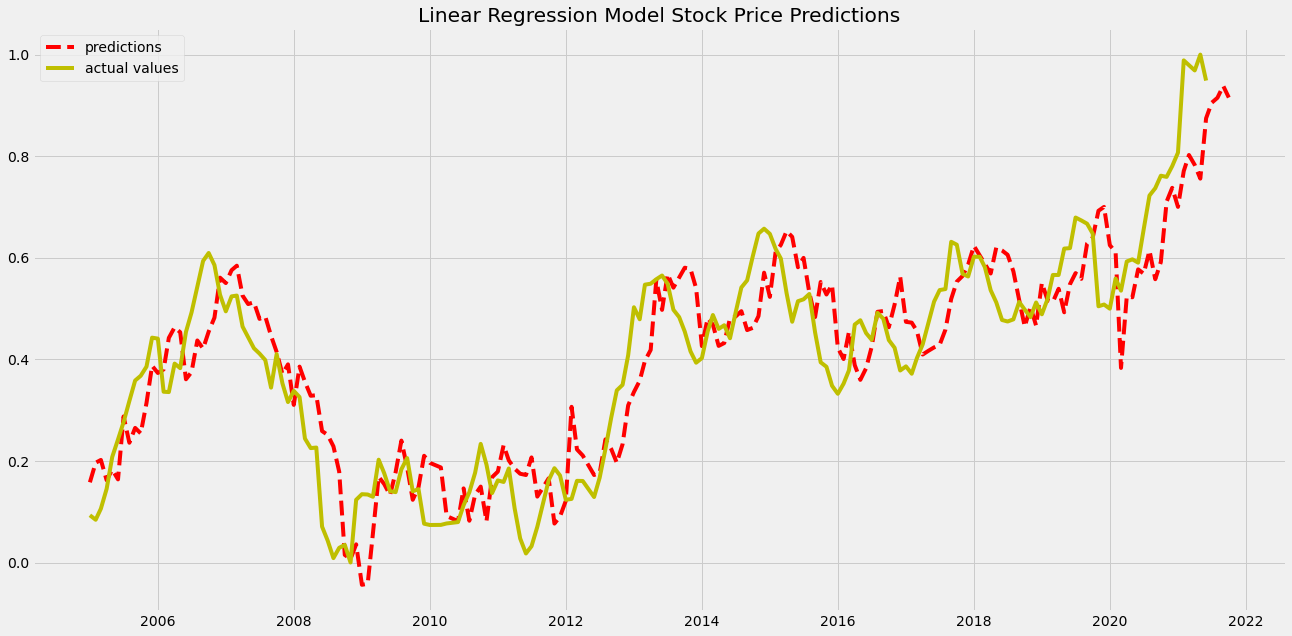

In [7]:
#Linear Model Regression
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test,y_pred_lr)
print('Mean squared error from linear reg:',mse_lr)
print('Mean absolute error',mae_lr)

y_pred_lr2 = lr_model.predict(x_test2)
lr_pred_data = pd.DataFrame(y_pred_lr2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Linear Regression Model Stock Price Predictions')
plt.plot(lr_pred_data[0],'r--',label='predictions')
plt.plot(lr_pred_data['prediction'],'y',label='actual values')
plt.legend()


Mean squared error from dt: 0.010623135380755603
Mean absolute error dt: 0.08060895767554059
Close          0.834429
sales          0.060579
Mkt-RF         0.027390
AvgCompound    0.021783
SMB            0.017086
PercPos        0.013655
AvgRate        0.013225
HML            0.011852
dtype: float64


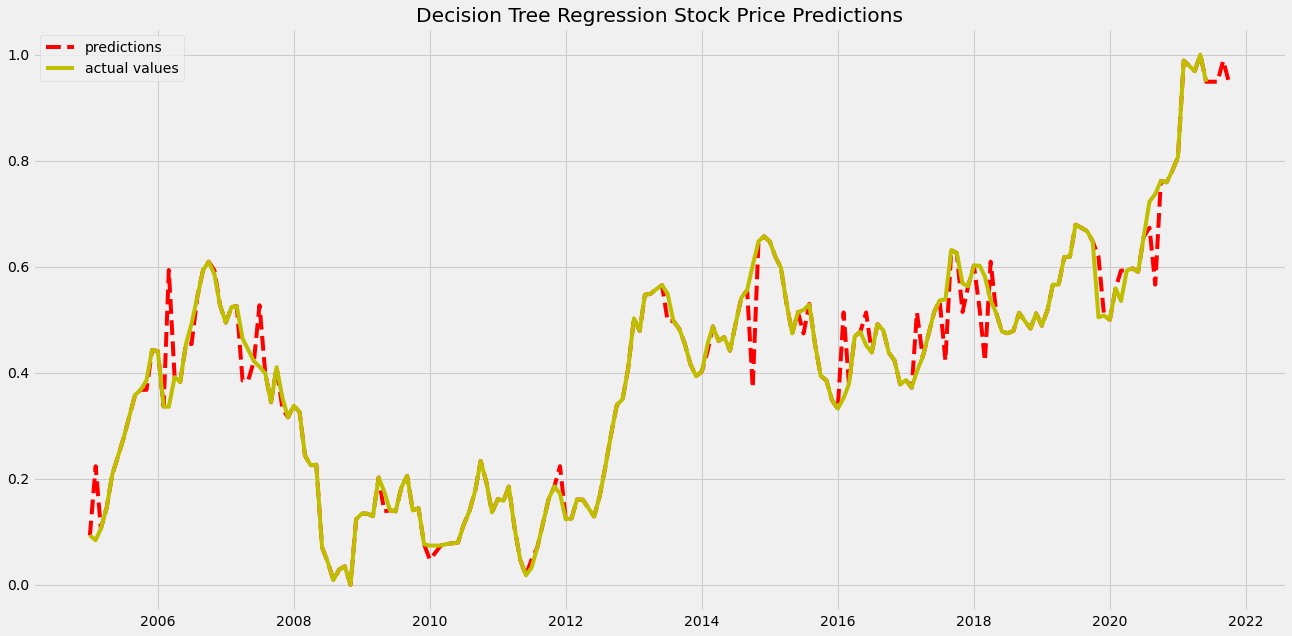

In [8]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
mse_dt = mean_squared_error(y_test,y_pred_tree)
mae_dt = mean_absolute_error(y_test,y_pred_tree)
r2_dt = r2_score(y_test,y_pred_tree)

print('Mean squared error from dt:',mse_dt)
print('Mean absolute error dt:',mae_dt)

y_pred_dt2 = tree.predict(x_test2)
dt_pred_data = pd.DataFrame(y_pred_dt2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Decision Tree Regression Stock Price Predictions')
plt.plot(dt_pred_data[0],'r--',label='predictions')
plt.plot(dt_pred_data['prediction'],'y',label='actual values')
plt.legend()

#Feature Ranking
print(pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False))


Mean squared error from dt: 0.009910968860612558
Mean absolute error dt: 0.07861047499964359
Feature Impotance
Close          0.841215
sales          0.050855
AvgRate        0.027964
Mkt-RF         0.022607
AvgCompound    0.017530
SMB            0.013951
PercPos        0.012947
HML            0.012932
dtype: float64


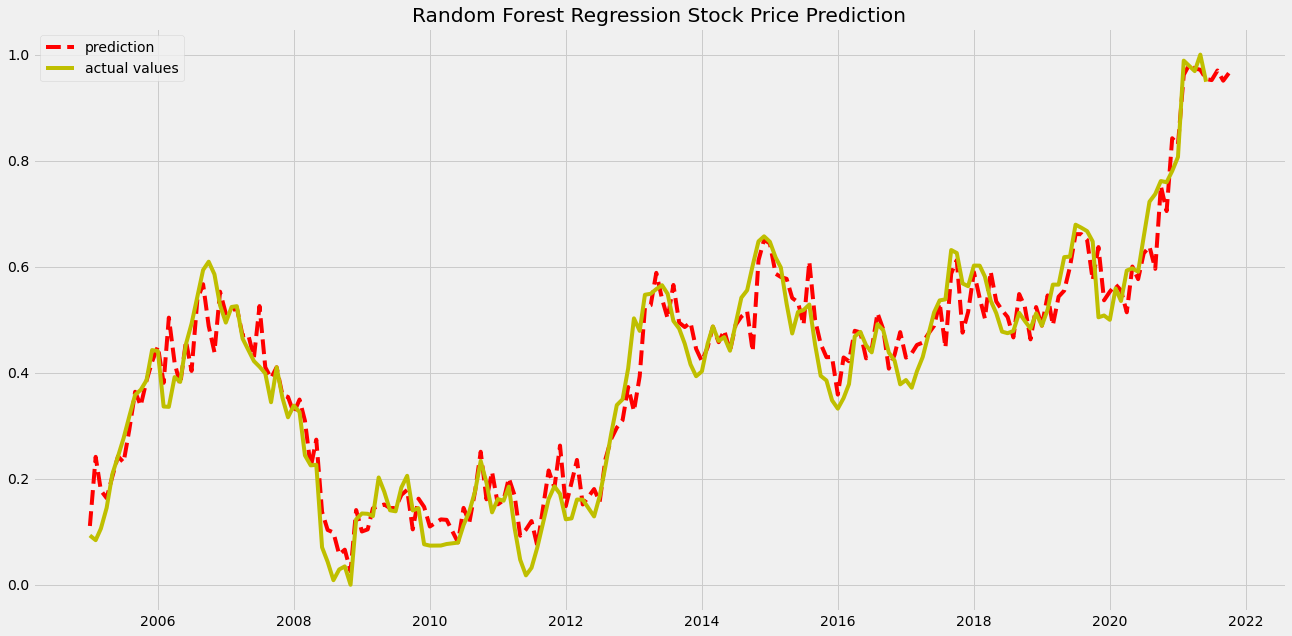

In [9]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor(n_estimators=10, random_state=30)
rfmodel.fit(x_train,y_train)

y_pred_rf = model.predict(x_test)
mse_rf = mean_squared_error(y_test,y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)
print('Mean squared error from dt:',mse_rf)
print('Mean absolute error dt:',mae_rf)

y_pred_rf2 = rfmodel.predict(x_test2)
rf_pred_data = pd.DataFrame(y_pred_rf2, index= y_test2.index).join(y_test2).sort_index()


plt.figure(figsize=(20,10))
plt.title('Random Forest Regression Stock Price Prediction')
plt.plot(rf_pred_data[0],'r--',label='prediction')
plt.plot(rf_pred_data['prediction'],'y',label='actual values')
plt.legend()

print('Feature Impotance')
print(pd.Series(rfmodel.feature_importances_, index=X.columns).sort_values(ascending=False))

In [10]:
print('Neural Networks mse,mae',mse_neural,mae_neural,r2_neu)
print('Linear Regression mse,mae',mse_lr,mae_lr,r2_lr)
print('Decison tree mse,mae',mse_dt,mae_dt,r2_dt)
print('Random forests mse,mae',mse_rf,mae_rf,r2_rf)

Neural Networks mse,mae 0.009910967200994492 0.07861047238111496 0.6838670941420659
Linear Regression mse,mae 0.008880921273404835 0.0772740041630777 0.716722805979688
Decison tree mse,mae 0.010623135380755603 0.08060895767554059 0.6611509223294103
Random forests mse,mae 0.009910968860612558 0.07861047499964359 0.6838670941420659


# Sales Predictions

In [32]:
df = pd.read_excel('FORD_monthly.xlsx')
df = df[['date','AvgRate','AvgCompound','sales','PercPos']]
df = df.dropna(how='any')
df = df.set_index('date')

#Normilize 
scaler = MinMaxScaler(feature_range=(0,1))
df[['AvgRate','sales']] = scaler.fit_transform(df[['AvgRate','sales']])

#Shift Data Frame
projection = 4
df['prediction'] = df[['sales']].shift(-projection)
df_1 = df[:-4]
X = df_1.drop(columns=['prediction'],axis=1)
y = df_1['prediction']

#Train Test Split 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.15)

x_test2 =  df.drop(columns=['prediction'])[:-1]
y_test2 = df['prediction'][:-1]

In [33]:
abs(df.corr().prediction).sort_values(ascending=False)

prediction     1.000000
sales          0.544501
AvgRate        0.031512
AvgCompound    0.028344
PercPos        0.027710
Name: prediction, dtype: float64

In [13]:
#Neural Networks Regression Sales

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()
model.add(Dense(1000, input_dim=4,activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(125,activation='relu'))
model.add(Dense(50,activation='relu'))

model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

history = model.fit(x_train, y_train, validation_split=0.2, epochs= 200)

Epoch 1/200
5/5 [==============================] - 1s 61ms/step - loss: 0.2036 - mae: 0.4265 - val_loss: 0.0452 - val_mae: 0.1857
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0404 - mae: 0.1652 - val_loss: 0.0294 - val_mae: 0.1398
Epoch 3/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0252 - mae: 0.1244 - val_loss: 0.0336 - val_mae: 0.1586
Epoch 4/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0249 - mae: 0.1260 - val_loss: 0.0142 - val_mae: 0.0979
Epoch 5/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0203 - mae: 0.1113 - val_loss: 0.0136 - val_mae: 0.0938
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0172 - mae: 0.1025 - val_loss: 0.0169 - val_mae: 0.1051
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0167 - mae: 0.1034 - val_loss: 0.0125 - val_mae: 0.0907
Epoch 8/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0155 - mae: 0.09

1/1 [==============================] - 0s 20ms/step - loss: 0.0075 - mae: 0.0683
Mean squared error : 0.0075468639843165874
Mean absolute error: 0.06828101724386215


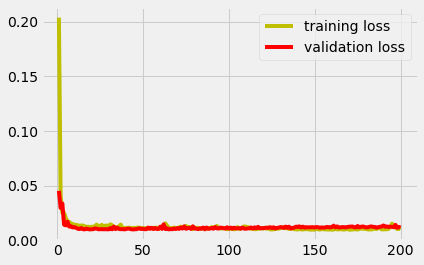

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'y',label='training loss')
plt.plot(epochs, val_loss,'r',label='validation loss')
plt.legend()

mse_neural, mae_neural = model.evaluate(x_test,y_test)

print('Mean squared error :',mse_neural)
print('Mean absolute error:',mae_neural)

y_pred_neu = model.predict(x_test)
r2_neu = r2_score(y_test,y_pred_neu)

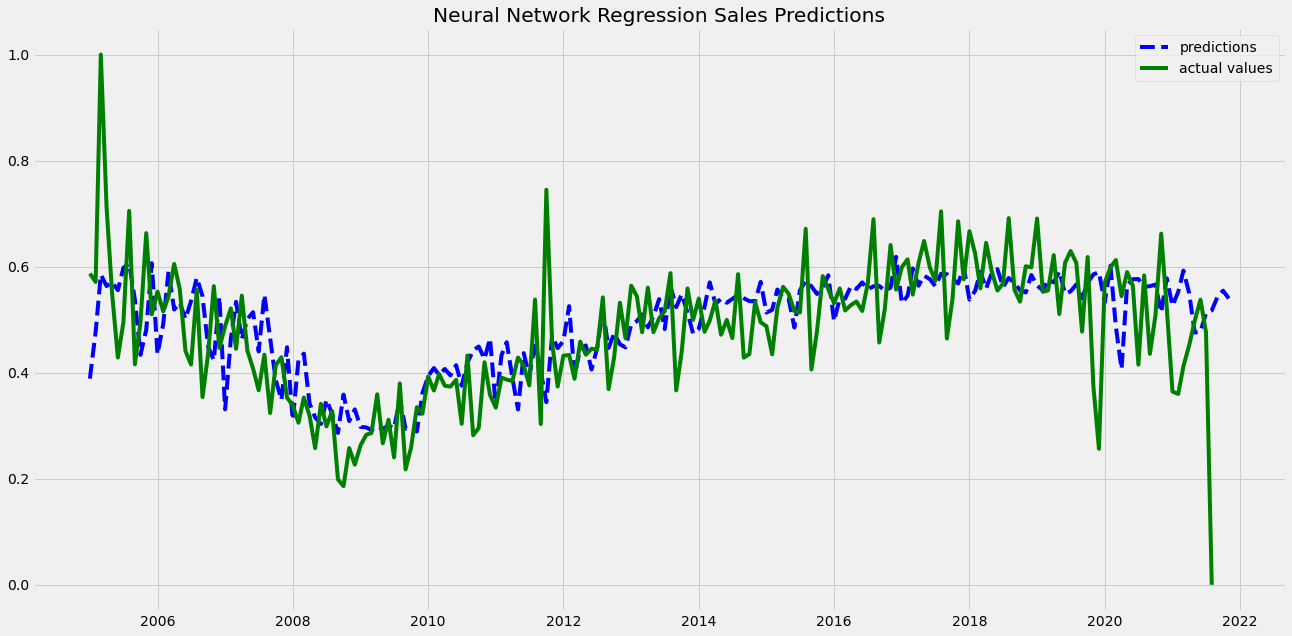

In [15]:
#Neural networks stock price predicitons
y_pred_neu2 = model.predict(x_test2)
neu_pred_data = pd.DataFrame(y_pred_neu2, index= y_test2.index).join(y_test2).sort_index()


plt.figure(figsize=(20,10))
plt.title('Neural Network Regression Sales Predictions')
plt.plot(neu_pred_data[0],'b--',label='predictions')
plt.plot(neu_pred_data['prediction'],'g',label='actual values')
plt.legend()

Mean squared error from linear reg: 0.008438898750789299
Mean absolute error 0.0759377502590727


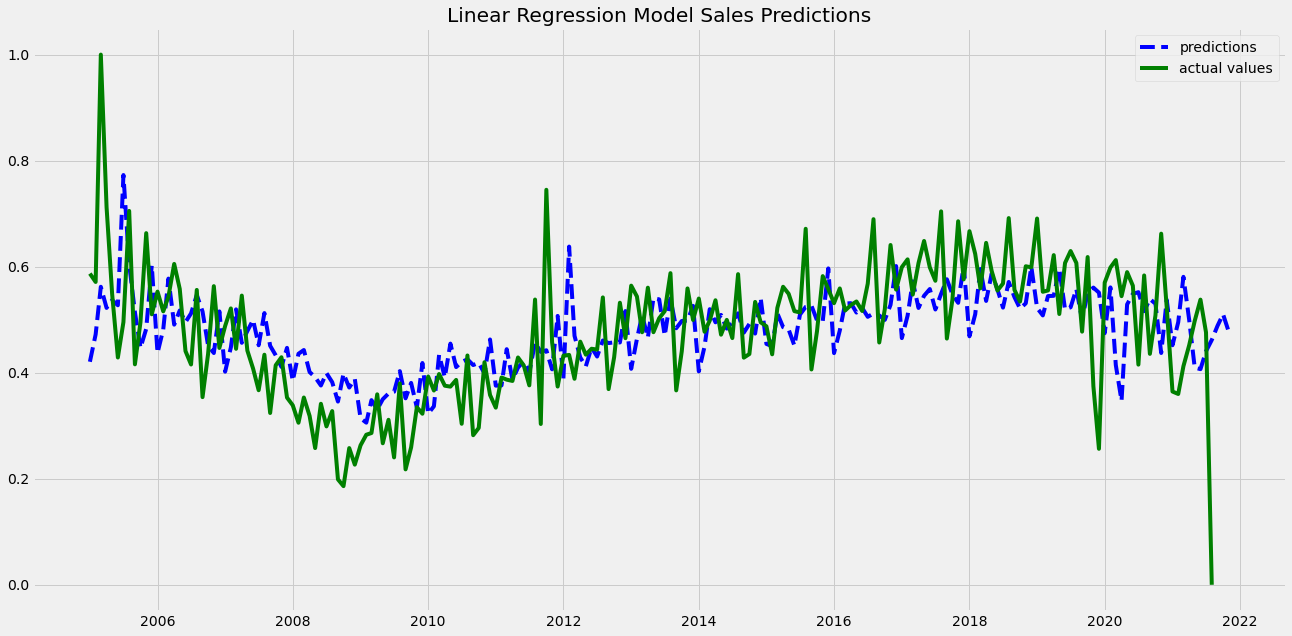

In [16]:
#Linear Model Regression
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test,y_pred_lr)
print('Mean squared error from linear reg:',mse_lr)
print('Mean absolute error',mae_lr)

y_pred_lr2 = lr_model.predict(x_test2)
lr_pred_data = pd.DataFrame(y_pred_lr2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Linear Regression Model Sales Predictions')
plt.plot(lr_pred_data[0],'b--',label='predictions')
plt.plot(lr_pred_data['prediction'],'g',label='actual values')
plt.legend()

Mean squared error from dt: 0.01396967088984389
Mean absolute error dt: 0.0968921634293369


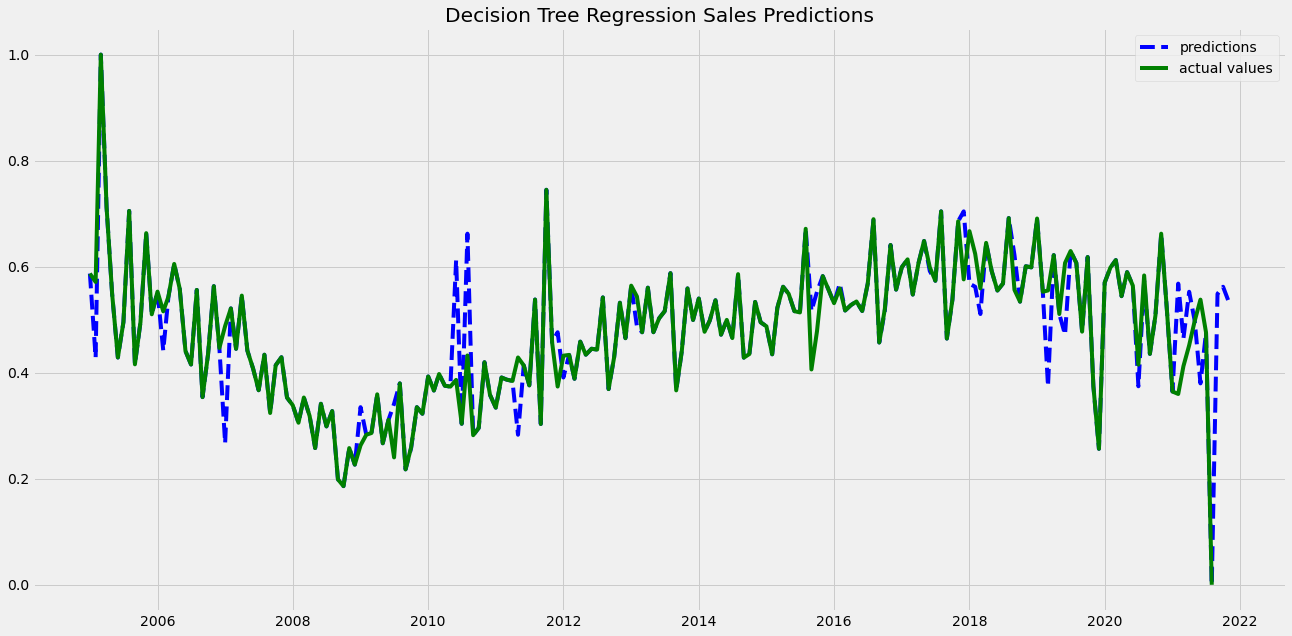

In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
mse_dt = mean_squared_error(y_test,y_pred_tree)
mae_dt = mean_absolute_error(y_test,y_pred_tree)
r2_dt = r2_score(y_test,y_pred_tree)

print('Mean squared error from dt:',mse_dt)
print('Mean absolute error dt:',mae_dt)

y_pred_dt2 = tree.predict(x_test2)
dt_pred_data = pd.DataFrame(y_pred_dt2, index= y_test2.index).join(y_test2).sort_index()

plt.figure(figsize=(20,10))
plt.title('Decision Tree Regression Sales Predictions')
plt.plot(dt_pred_data[0],'b--',label='predictions')
plt.plot(dt_pred_data['prediction'],'g',label='actual values')
plt.legend()


Mean squared error from dt: 0.007546863757052794
Mean absolute error dt: 0.06828101541390962
sales          0.560181
AvgRate        0.240144
AvgCompound    0.112491
PercPos        0.087184
dtype: float64


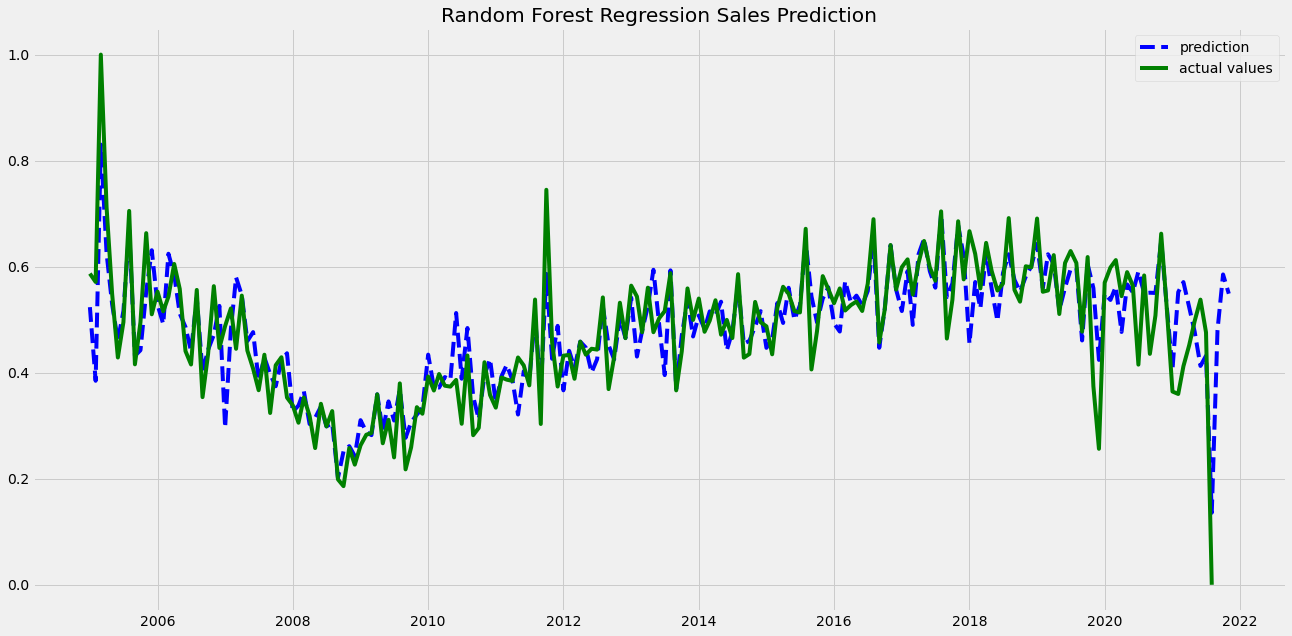

In [18]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor(n_estimators=10, random_state=30)
rfmodel.fit(x_train,y_train)

y_pred_rf = model.predict(x_test)
mse_rf = mean_squared_error(y_test,y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)
print('Mean squared error from dt:',mse_rf)
print('Mean absolute error dt:',mae_rf)

y_pred_rf2 = rfmodel.predict(x_test2)
rf_pred_data = pd.DataFrame(y_pred_rf2, index= y_test2.index).join(y_test2).sort_index()

print(pd.Series(rfmodel.feature_importances_, index=X.columns).sort_values(ascending=False))


plt.figure(figsize=(20,10))
plt.title('Random Forest Regression Sales Prediction')
plt.plot(rf_pred_data[0],'b--',label='prediction')
plt.plot(rf_pred_data['prediction'],'g',label='actual values')
plt.legend()

In [19]:
print('Neural Networks mse,mae,r2:  ',mse_neural,mae_neural,r2_neu)
print('Linear Regression mse,mae,r2:',mse_lr,mae_lr,r2_lr)
print('Decison tree mse,mae,r2',mse_dt,mae_dt,r2_dt)
print('Random forests mse,mae,r2',mse_rf,mae_rf,r2_rf)


Neural Networks mse,mae,r2:   0.0075468639843165874 0.06828101724386215 0.3683170472685062
Linear Regression mse,mae,r2: 0.008438898750789299 0.0759377502590727 0.29365248236805985
Decison tree mse,mae,r2 0.01396967088984389 0.0968921634293369 -0.1692808086189559
Random forests mse,mae,r2 0.007546863757052794 0.06828101541390962 0.3683170472685062
